# **Round 2**

In [1]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv('marketing_customer_analysis.csv')

Show the dataframe shape.


In [2]:
data.shape

(10910, 26)

Standardize header names.


In [3]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

I remove the index column 'Unnamed: 0' created automatically

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

Now I make all column names into uppercase

In [5]:
def columns_to_upper (table):
    table.columns = list(map(lambda x: x.upper(), table.columns))
    return table

In [6]:
data = columns_to_upper(data)
data.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,VEHICLE TYPE
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


Next step is removing spaces from the names to make them easier to use and to read

In [7]:
def remove_column_spaces(table):
    #Changes blank spaces into underscores for the names of the columns in "table"
    table.columns = list(map(lambda x: x.replace(" ","_"), table.columns))
    return table

In [8]:
data = remove_column_spaces(data)
data.head()

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE,VEHICLE_TYPE
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


Change 'EMPLOYMENTSTATUS' to 'EMPLOYMENT_STATUS'

In [9]:
data = data.rename(columns={'EMPLOYMENTSTATUS': 'EMPLOYMENT_STATUS'})
data.head()

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENT_STATUS,GENDER,INCOME,...,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE,VEHICLE_TYPE
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


Which columns are numerical?


In [10]:
data.dtypes

CUSTOMER                          object
STATE                             object
CUSTOMER_LIFETIME_VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE_TO_DATE                 object
EMPLOYMENT_STATUS                 object
GENDER                            object
INCOME                             int64
LOCATION_CODE                     object
MARITAL_STATUS                    object
MONTHLY_PREMIUM_AUTO               int64
MONTHS_SINCE_LAST_CLAIM          float64
MONTHS_SINCE_POLICY_INCEPTION      int64
NUMBER_OF_OPEN_COMPLAINTS        float64
NUMBER_OF_POLICIES                 int64
POLICY_TYPE                       object
POLICY                            object
RENEW_OFFER_TYPE                  object
SALES_CHANNEL                     object
TOTAL_CLAIM_AMOUNT               float64
VEHICLE_CLASS                     object
VEHICLE_SIZE                      object
VEHICLE_TYPE    

In [11]:
data._get_numeric_data().columns

Index(['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES',
       'TOTAL_CLAIM_AMOUNT'],
      dtype='object')

Which columns are categorical?


In [12]:
data.select_dtypes(include=['object']).columns

Index(['CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION',
       'EFFECTIVE_TO_DATE', 'EMPLOYMENT_STATUS', 'GENDER', 'LOCATION_CODE',
       'MARITAL_STATUS', 'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE',
       'SALES_CHANNEL', 'VEHICLE_CLASS', 'VEHICLE_SIZE', 'VEHICLE_TYPE'],
      dtype='object')

Check and deal with NaN values.


First I need to check how many NaN values are there in the dataframe

In [13]:
data.isna().sum()


CUSTOMER                            0
STATE                             631
CUSTOMER_LIFETIME_VALUE             0
RESPONSE                          631
COVERAGE                            0
EDUCATION                           0
EFFECTIVE_TO_DATE                   0
EMPLOYMENT_STATUS                   0
GENDER                              0
INCOME                              0
LOCATION_CODE                       0
MARITAL_STATUS                      0
MONTHLY_PREMIUM_AUTO                0
MONTHS_SINCE_LAST_CLAIM           633
MONTHS_SINCE_POLICY_INCEPTION       0
NUMBER_OF_OPEN_COMPLAINTS         633
NUMBER_OF_POLICIES                  0
POLICY_TYPE                         0
POLICY                              0
RENEW_OFFER_TYPE                    0
SALES_CHANNEL                       0
TOTAL_CLAIM_AMOUNT                  0
VEHICLE_CLASS                     622
VEHICLE_SIZE                      622
VEHICLE_TYPE                     5482
dtype: int64

According to these results, I will drop the 'VEHICLE_TYPE' column, as half of its values are NaN

In [14]:
data = data.drop(['VEHICLE_TYPE'], axis=1)
data

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENT_STATUS,GENDER,INCOME,...,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


As I have not done it before, I will remove duplicates

In [15]:
data = data.drop_duplicates()
data.isna().sum()

CUSTOMER                           0
STATE                            612
CUSTOMER_LIFETIME_VALUE            0
RESPONSE                         612
COVERAGE                           0
EDUCATION                          0
EFFECTIVE_TO_DATE                  0
EMPLOYMENT_STATUS                  0
GENDER                             0
INCOME                             0
LOCATION_CODE                      0
MARITAL_STATUS                     0
MONTHLY_PREMIUM_AUTO               0
MONTHS_SINCE_LAST_CLAIM          618
MONTHS_SINCE_POLICY_INCEPTION      0
NUMBER_OF_OPEN_COMPLAINTS        618
NUMBER_OF_POLICIES                 0
POLICY_TYPE                        0
POLICY                             0
RENEW_OFFER_TYPE                   0
SALES_CHANNEL                      0
TOTAL_CLAIM_AMOUNT                 0
VEHICLE_CLASS                    595
VEHICLE_SIZE                     595
dtype: int64

I will fill the NaN values in 'MONTHS_SINCE_LAST_CLAIM' and 'NUMBER_OF_OPEN_COMPLAINTS' with the means of those rows as they are numerical, and drop the remaining rows with NaN values in them.
I will do it in a copy of the variable to keep the original dataframe while I advance.

In [16]:
clean_data = data.copy()

In [17]:
mean_claim = data['MONTHS_SINCE_LAST_CLAIM'].mean()
clean_data['MONTHS_SINCE_LAST_CLAIM'] = clean_data['MONTHS_SINCE_LAST_CLAIM'].fillna(mean_claim)
mean_complains = data['NUMBER_OF_OPEN_COMPLAINTS'].mean()
clean_data['NUMBER_OF_OPEN_COMPLAINTS'] = clean_data['NUMBER_OF_OPEN_COMPLAINTS'].fillna(mean_complains)
clean_data.isna().sum()

CUSTOMER                           0
STATE                            612
CUSTOMER_LIFETIME_VALUE            0
RESPONSE                         612
COVERAGE                           0
EDUCATION                          0
EFFECTIVE_TO_DATE                  0
EMPLOYMENT_STATUS                  0
GENDER                             0
INCOME                             0
LOCATION_CODE                      0
MARITAL_STATUS                     0
MONTHLY_PREMIUM_AUTO               0
MONTHS_SINCE_LAST_CLAIM            0
MONTHS_SINCE_POLICY_INCEPTION      0
NUMBER_OF_OPEN_COMPLAINTS          0
NUMBER_OF_POLICIES                 0
POLICY_TYPE                        0
POLICY                             0
RENEW_OFFER_TYPE                   0
SALES_CHANNEL                      0
TOTAL_CLAIM_AMOUNT                 0
VEHICLE_CLASS                    595
VEHICLE_SIZE                     595
dtype: int64

In [18]:
clean_data = clean_data.dropna()
display(clean_data.shape)
clean_data.isna().sum()

(9676, 24)

CUSTOMER                         0
STATE                            0
CUSTOMER_LIFETIME_VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE_TO_DATE                0
EMPLOYMENT_STATUS                0
GENDER                           0
INCOME                           0
LOCATION_CODE                    0
MARITAL_STATUS                   0
MONTHLY_PREMIUM_AUTO             0
MONTHS_SINCE_LAST_CLAIM          0
MONTHS_SINCE_POLICY_INCEPTION    0
NUMBER_OF_OPEN_COMPLAINTS        0
NUMBER_OF_POLICIES               0
POLICY_TYPE                      0
POLICY                           0
RENEW_OFFER_TYPE                 0
SALES_CHANNEL                    0
TOTAL_CLAIM_AMOUNT               0
VEHICLE_CLASS                    0
VEHICLE_SIZE                     0
dtype: int64

In [19]:
clean_data = clean_data.reset_index(drop=True)
clean_data

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENT_STATUS,GENDER,INCOME,...,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,0.383939,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,32,0.000000,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
9672,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,0.383939,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
9673,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
9674,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


**Datetime format** - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.


In [20]:
clean_data['EFFECTIVE_TO_DATE'] = pd.to_datetime(clean_data['EFFECTIVE_TO_DATE'], errors='coerce')
clean_data['EFFECTIVE_TO_DATE']

0      2011-02-18
1      2011-01-18
2      2011-02-10
3      2011-01-11
4      2011-01-17
          ...    
9671   2011-02-24
9672   2011-01-19
9673   2011-01-06
9674   2011-02-06
9675   2011-02-13
Name: EFFECTIVE_TO_DATE, Length: 9676, dtype: datetime64[ns]

In [21]:
clean_data['MONTH'] = clean_data['EFFECTIVE_TO_DATE'].dt.month
clean_data['MONTH']

0       2
1       1
2       2
3       1
4       1
       ..
9671    2
9672    1
9673    1
9674    2
9675    2
Name: MONTH, Length: 9676, dtype: int64

In [22]:
clean_data[clean_data['MONTH']<4]

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENT_STATUS,GENDER,INCOME,...,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE,MONTH
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.383939,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.000000,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
9672,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,0.383939,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,1
9673,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
9674,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


BONUS: Put all the previously mentioned data transformations into a function.

# **Round 3**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Show DataFrame info.


In [24]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9676 entries, 0 to 9675
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       9676 non-null   object        
 1   STATE                          9676 non-null   object        
 2   CUSTOMER_LIFETIME_VALUE        9676 non-null   float64       
 3   RESPONSE                       9676 non-null   object        
 4   COVERAGE                       9676 non-null   object        
 5   EDUCATION                      9676 non-null   object        
 6   EFFECTIVE_TO_DATE              9676 non-null   datetime64[ns]
 7   EMPLOYMENT_STATUS              9676 non-null   object        
 8   GENDER                         9676 non-null   object        
 9   INCOME                         9676 non-null   int64         
 10  LOCATION_CODE                  9676 non-null   object        
 11  MARITAL_STATUS   

Describe DataFrame.


In [25]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_LIFETIME_VALUE,9676.0,7992.786138,6829.201406,1898.007675,4010.669676,5782.095838,8983.147788,83325.381190
INCOME,9676.0,37560.680860,30349.686902,0.000000,0.000000,33806.000000,62264.250000,99981.000000
MONTHLY_PREMIUM_AUTO,9676.0,93.269016,34.400115,61.000000,68.000000,83.000000,109.000000,298.000000
MONTHS_SINCE_LAST_CLAIM,9676.0,15.099622,9.787041,0.000000,7.000000,15.000000,23.000000,35.000000
MONTHS_SINCE_POLICY_INCEPTION,9676.0,48.065316,27.911300,0.000000,24.000000,48.000000,71.000000,99.000000
NUMBER_OF_OPEN_COMPLAINTS,9676.0,0.384363,0.884516,0.000000,0.000000,0.000000,0.383939,5.000000
NUMBER_OF_POLICIES,9676.0,2.975920,2.395978,1.000000,1.000000,2.000000,4.000000,9.000000
TOTAL_CLAIM_AMOUNT,9676.0,435.348164,291.624841,0.099007,272.152587,384.000000,550.203407,2893.239678
MONTH,9676.0,1.465275,0.498818,1.000000,1.000000,1.000000,2.000000,2.000000


Show a plot of the total number of responses.


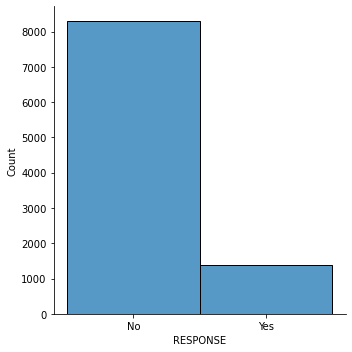

In [26]:
sns.displot(clean_data["RESPONSE"])
plt.show()

Show a plot of the response rate by the sales channel.


I group the info by channels and responses and save it into a Series

In [27]:
table = clean_data.groupby(['SALES_CHANNEL', 'RESPONSE']).size()
display(table)

type(table)


SALES_CHANNEL  RESPONSE
Agent          No          2977
               Yes          699
Branch         No          2391
               Yes          306
Call Center    No          1690
               Yes          203
Web            No          1241
               Yes          169
dtype: int64

pandas.core.series.Series

I calculate the rates in percentages in a for loop to store them in a list

In [28]:
def find_rates(table): 
    #Finds the rate of one value against the other in a Series object created using groupby
    #Those values should be YES or NO
    rates = []
    for i in range(1, len(table), 2):
        rates.append((table[i]/(table[i]+table[i-1]))*100)
    return rates

In [29]:
rate_list = []

rate_list = find_rates(table)
rate_list


[19.015233949945593, 11.345939933259176, 10.723718964606444, 11.98581560283688]

And then I can plot using the Channels in the x index and the list in the y index

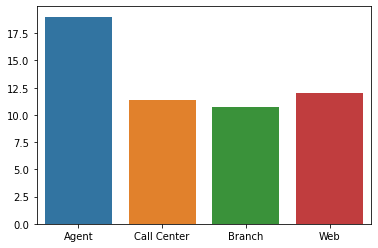

In [30]:
sns.barplot(x=clean_data['SALES_CHANNEL'].unique(), y=rate_list)
plt.show()

Show a plot of the response rate by the total claim amount.


I create a copy of the list to work on it

In [31]:
claim_amount = clean_data.copy()

Using pandas.cut() I can find 5 intervals of the values in 'TOTAL_CLAIM_AMOUNT'

In [32]:
claim_amount['RANGE'] = pd.cut(clean_data.TOTAL_CLAIM_AMOUNT, 5)
claim_amount['RANGE'].unique()

[(-2.794, 578.727], (578.727, 1157.355], (1157.355, 1735.983], (1735.983, 2314.612], (2314.612, 2893.24]]
Categories (5, interval[float64, right]): [(-2.794, 578.727] < (578.727, 1157.355] < (1157.355, 1735.983] < (1735.983, 2314.612] < (2314.612, 2893.24]]

In [33]:
claim_amount_responses = claim_amount.groupby(['RANGE', 'RESPONSE']).size()
claim_amount_responses

RANGE                 RESPONSE
(-2.794, 578.727]     No          6473
                      Yes         1127
(578.727, 1157.355]   No          1583
                      Yes          213
(1157.355, 1735.983]  No           197
                      Yes           37
(1735.983, 2314.612]  No            40
                      Yes            0
(2314.612, 2893.24]   No             6
                      Yes            0
dtype: int64

In [34]:
claim_rates = []
claim_rates = find_rates(claim_amount_responses)
claim_rates

[14.828947368421053, 11.859688195991092, 15.81196581196581, 0.0, 0.0]

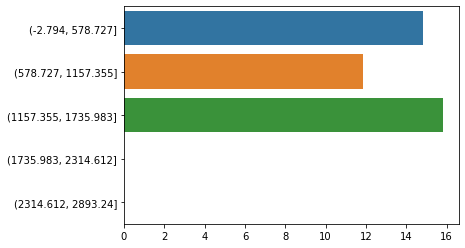

In [35]:
sns.barplot(x=claim_rates, y=claim_amount['RANGE'].unique())
plt.show()

Show a plot of the response rate by income.

In this case I choose to make 10 groups instead of 5

In [36]:
income_table = clean_data.copy()
income_table['RANGE_INCOME'] = pd.cut(income_table.INCOME, 10)

income_table_responses = income_table.groupby(['RANGE_INCOME', 'RESPONSE']).size()
income_table_responses

RANGE_INCOME        RESPONSE
(-99.981, 9998.1]   No          2247
                    Yes          215
(9998.1, 19996.2]   No           385
                    Yes          169
(19996.2, 29994.3]  No          1175
                    Yes          291
(29994.3, 39992.4]  No           815
                    Yes          138
(39992.4, 49990.5]  No           710
                    Yes           73
(49990.5, 59988.6]  No           709
                    Yes          126
(59988.6, 69986.7]  No           691
                    Yes          121
(69986.7, 79984.8]  No           615
                    Yes          124
(79984.8, 89982.9]  No           511
                    Yes           59
(89982.9, 99981.0]  No           441
                    Yes           61
dtype: int64

In [37]:
income_rates = []
income_rates = find_rates(income_table_responses)
income_rates

[8.732737611697807,
 30.505415162454874,
 19.84993178717599,
 14.480587618048268,
 9.323116219667945,
 15.089820359281436,
 14.901477832512317,
 16.77943166441137,
 10.350877192982457,
 12.151394422310757]

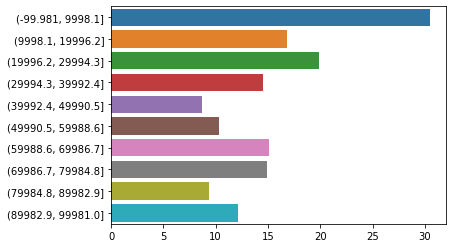

In [38]:
sns.barplot(x=income_rates, y=income_table['RANGE_INCOME'].unique())
plt.show()

# **Round 4**

#### Check the data types of the columns. Get the numeric data into dataframe called `numerical` and `categorical` columns in a dataframe called categoricals. (You can use `np.number` and `np.object` to select the numerical data types and categorical data types respectively)

In [39]:
clean_data.dtypes

CUSTOMER                                 object
STATE                                    object
CUSTOMER_LIFETIME_VALUE                 float64
RESPONSE                                 object
COVERAGE                                 object
EDUCATION                                object
EFFECTIVE_TO_DATE                datetime64[ns]
EMPLOYMENT_STATUS                        object
GENDER                                   object
INCOME                                    int64
LOCATION_CODE                            object
MARITAL_STATUS                           object
MONTHLY_PREMIUM_AUTO                      int64
MONTHS_SINCE_LAST_CLAIM                 float64
MONTHS_SINCE_POLICY_INCEPTION             int64
NUMBER_OF_OPEN_COMPLAINTS               float64
NUMBER_OF_POLICIES                        int64
POLICY_TYPE                              object
POLICY                                   object
RENEW_OFFER_TYPE                         object
SALES_CHANNEL                           

In [40]:
numerical = clean_data._get_numeric_data()
numerical.dtypes

CUSTOMER_LIFETIME_VALUE          float64
INCOME                             int64
MONTHLY_PREMIUM_AUTO               int64
MONTHS_SINCE_LAST_CLAIM          float64
MONTHS_SINCE_POLICY_INCEPTION      int64
NUMBER_OF_OPEN_COMPLAINTS        float64
NUMBER_OF_POLICIES                 int64
TOTAL_CLAIM_AMOUNT               float64
MONTH                              int64
dtype: object

In [41]:
categorical = clean_data.select_dtypes(include=['object'])
categorical.dtypes

CUSTOMER             object
STATE                object
RESPONSE             object
COVERAGE             object
EDUCATION            object
EMPLOYMENT_STATUS    object
GENDER               object
LOCATION_CODE        object
MARITAL_STATUS       object
POLICY_TYPE          object
POLICY               object
RENEW_OFFER_TYPE     object
SALES_CHANNEL        object
VEHICLE_CLASS        object
VEHICLE_SIZE         object
dtype: object

#### Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution?

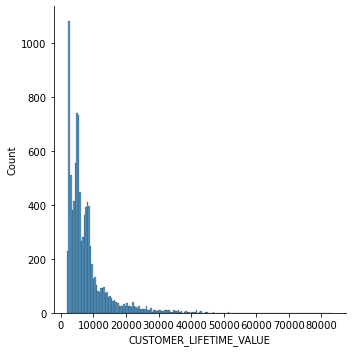

In [42]:
sns.displot(numerical['CUSTOMER_LIFETIME_VALUE'])

I can loop through the columns to create all the distribution plots in one go

In [43]:
def distributions(table):
    #Plots a displot for each column in a table
    #All those columns must be numerical
    for name in table.columns:
        sns.displot(table[name])
        plt.show()

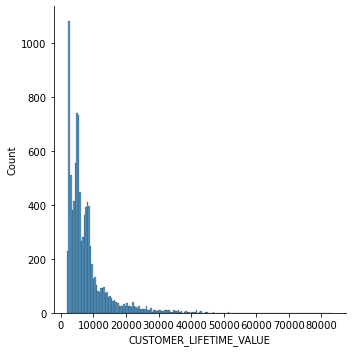

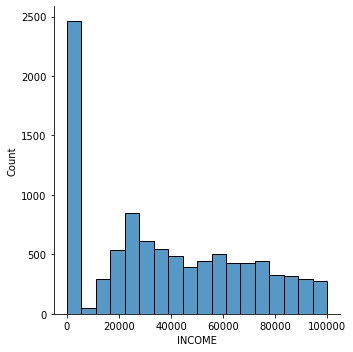

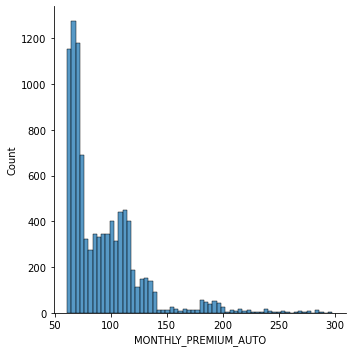

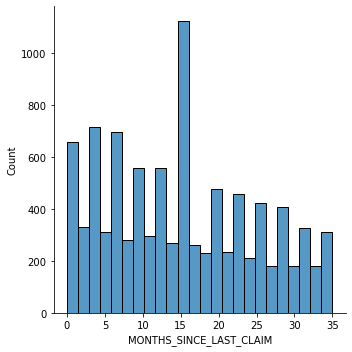

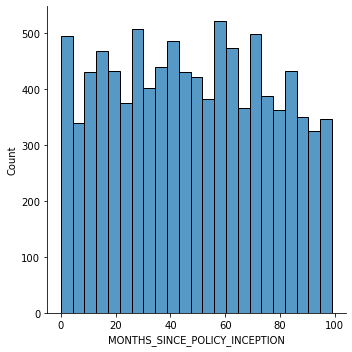

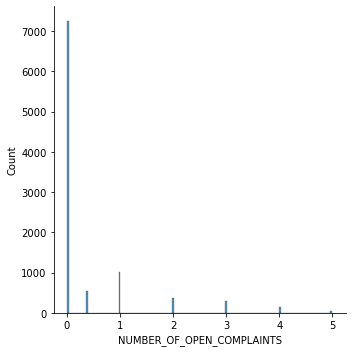

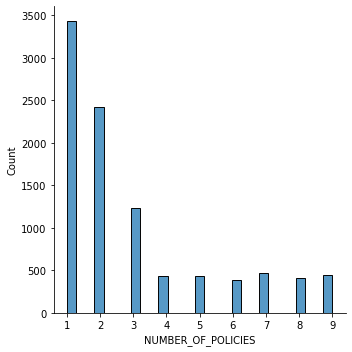

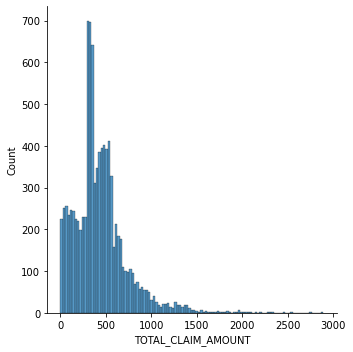

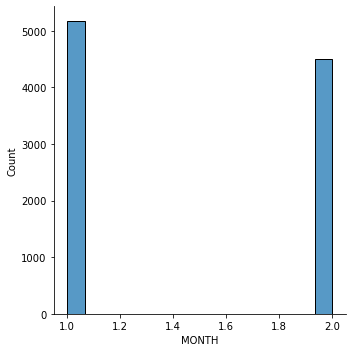

In [44]:
distributions(numerical)

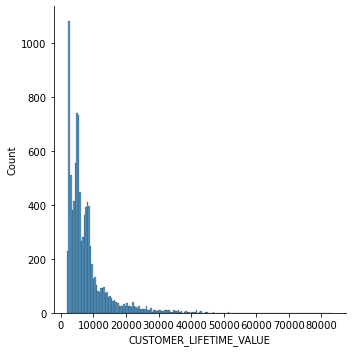

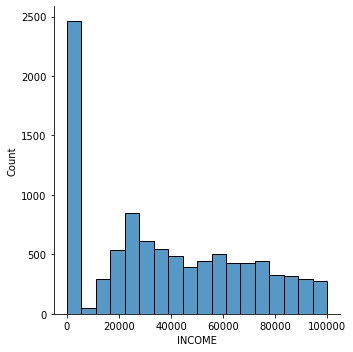

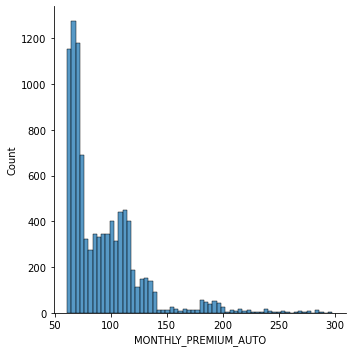

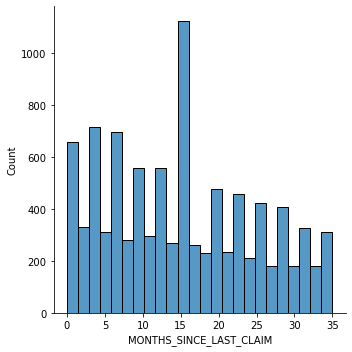

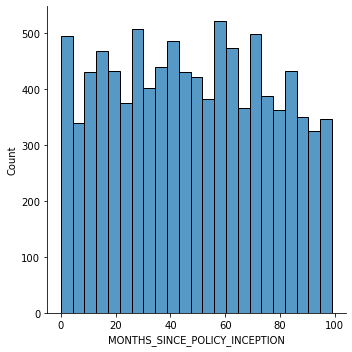

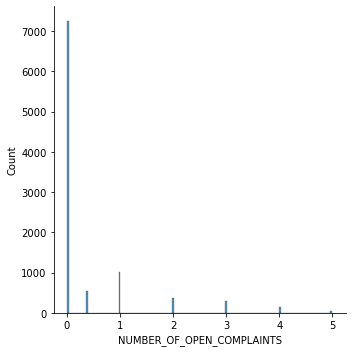

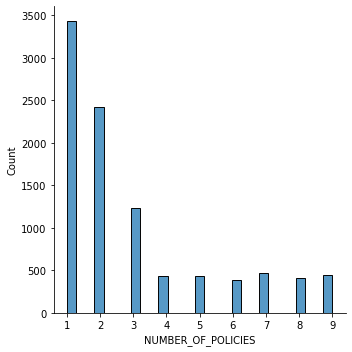

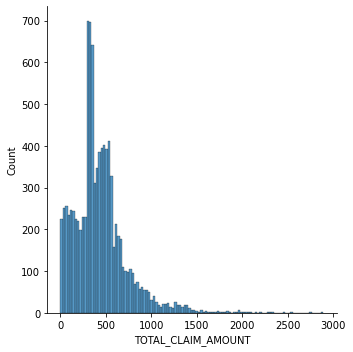

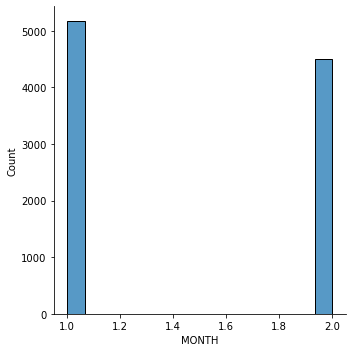

In [45]:
for name in numerical.columns:
    sns.displot(numerical[name])
    plt.show()

Same with the histograms

In [46]:
def histograms(table):
    #Plots a histogram for each column in a table
    #All those columns must be numerical
    for name in table.columns:
        plt.hist(table[name])
        plt.show()
        print(name)

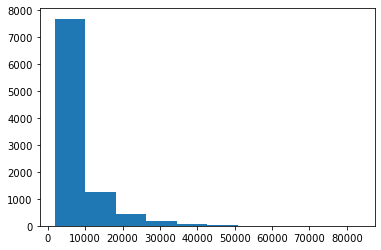

CUSTOMER_LIFETIME_VALUE


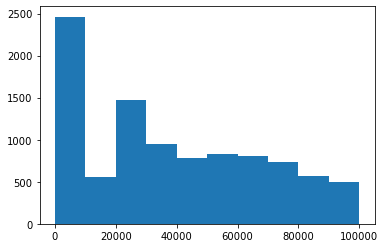

INCOME


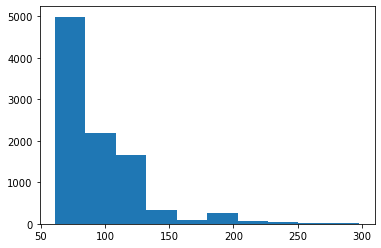

MONTHLY_PREMIUM_AUTO


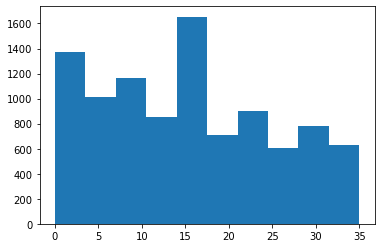

MONTHS_SINCE_LAST_CLAIM


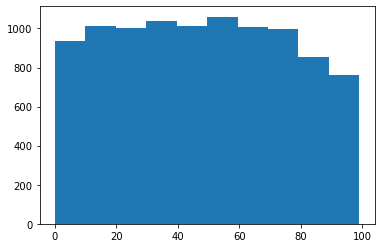

MONTHS_SINCE_POLICY_INCEPTION


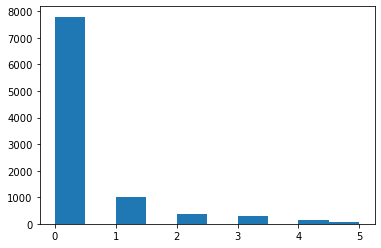

NUMBER_OF_OPEN_COMPLAINTS


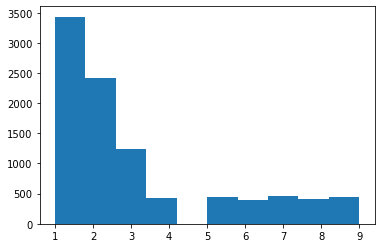

NUMBER_OF_POLICIES


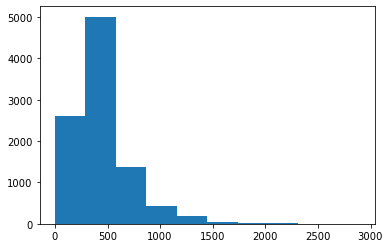

TOTAL_CLAIM_AMOUNT


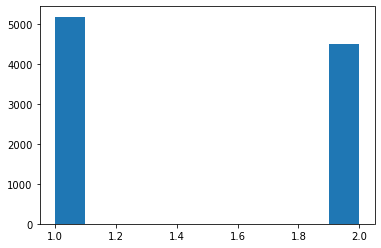

MONTH


In [47]:
histograms(numerical)

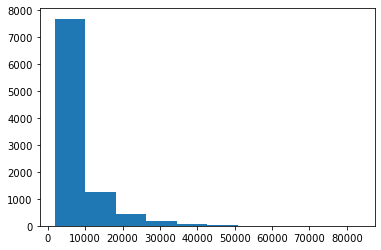

CUSTOMER_LIFETIME_VALUE


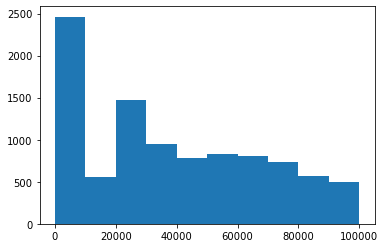

INCOME


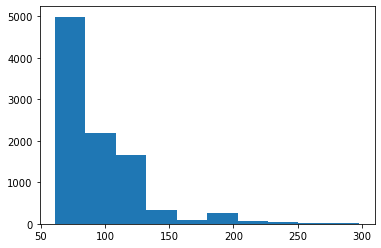

MONTHLY_PREMIUM_AUTO


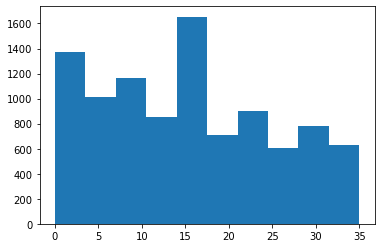

MONTHS_SINCE_LAST_CLAIM


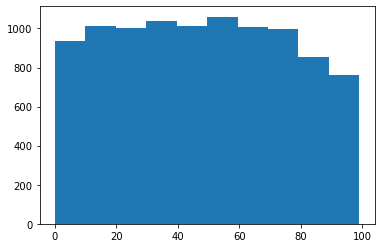

MONTHS_SINCE_POLICY_INCEPTION


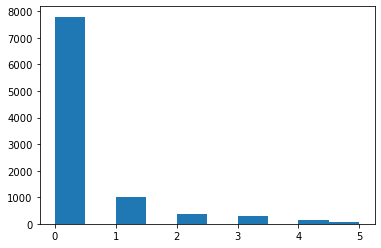

NUMBER_OF_OPEN_COMPLAINTS


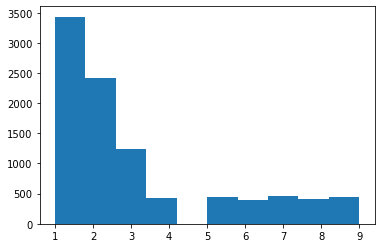

NUMBER_OF_POLICIES


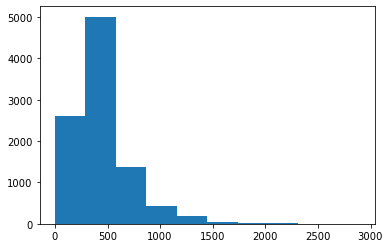

TOTAL_CLAIM_AMOUNT


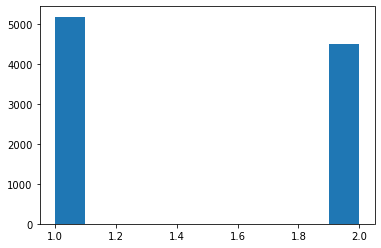

MONTH


In [48]:
for name in numerical.columns:
    plt.hist(numerical[name])
    plt.show()
    print(name)

The plots do not look like normal distributions, as in, they don't fit inside a gaussian bell diagram

#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.

In [49]:
def corr_heatmap(table):
    #Plots a correlations heatmap for a table
    #All the values must be numerical
    correlations_matrix = table.corr()
    sns.heatmap(correlations_matrix, annot=True)
    plt.show()

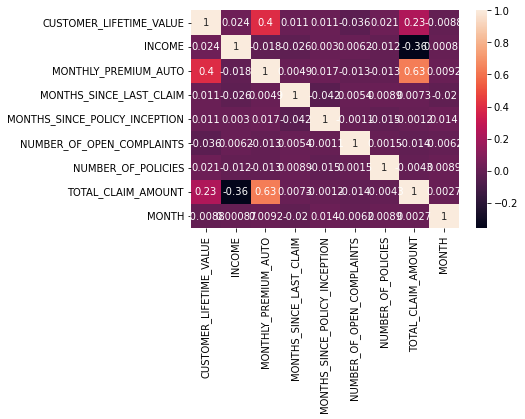

In [50]:
corr_heatmap(numerical)

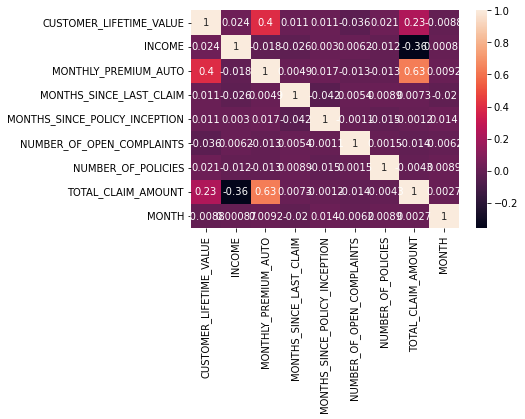

In [51]:
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
sns.pairplot(numerical)
plt.show()

#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

As there are no correlations greater than 0.9 (the highest is 0.63 between `MONTHLY_PREMIUM_AUTO` and `TOTAL_CLAIM_AMOUNT`) I am not droping any columns

## **Round 5**

#### Processing Data
- X-y split.
- Normalize (numerical).

As I have already worked on the numerical columns with the dataframe `numerical` I will be using it as a base to do the split.
But first, I have to remove the `MONTH` column, as it won't offer any data of use.

In [ ]:
numerical = numerical.drop(['MONTH'], axis=1)

In [ ]:
# numerical
y = numerical['TOTAL_CLAIM_AMOUNT']
X = numerical.drop(['TOTAL_CLAIM_AMOUNT'], axis=1)
display(y)
X

For normalizing, I prefer having values in the [0,1] range, so I choose the `MinMaxScaler()` function

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)

numerical_normalized = pd.DataFrame(x_normalized, columns=X.columns)
numerical_normalized

### **Round 6**

One Hot/Label Encoding (categorical).

In [ ]:
categorical

In [ ]:
categorical.POLICY_TYPE.unique()

In [ ]:
categorical.POLICY.unique()

As the information in `POLICY_TYPE` is included in `POLICY` I will drop the column `POLICY_TYPE`.
Also, the `CUSTOMER` column offer no important information as it is only an identifier

In [ ]:
categorical = categorical.drop(['POLICY_TYPE', 'CUSTOMER'], axis=1)


In [ ]:
categorical.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

To make it easier to work on the categories, I want to divide them into the ones I want to apply One Hot encoding and the ones I want to apply Label encoding to.

In [ ]:
categorical_OH = categorical[['STATE','GENDER','LOCATION_CODE', 'MARITAL_STATUS', 'POLICY','SALES_CHANNEL', 'VEHICLE_CLASS']].copy()
categorical_label = categorical[['RESPONSE', 'COVERAGE', 'EDUCATION', 'EMPLOYMENT_STATUS', 'RENEW_OFFER_TYPE', 'VEHICLE_SIZE']].copy()

In [ ]:
categorical_OH

In [ ]:
encoder = OneHotEncoder().fit(categorical_OH)
encoded_for_p = encoder.transform(categorical_OH).toarray()

encoder.categories_
cols = [colname for row in encoder.categories_ for colname in row]

onehot_table = pd.DataFrame(encoded_for_p, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]

onehot_table = onehot_table.drop(cols_to_drop,axis=1)
onehot_table

In [ ]:
categorical_label

In [ ]:
from sklearn.preprocessing import LabelEncoder

Using the line in this web
https://www.kite.com/python/answers/how-to-encode-labels-for-multiple-columns-with-scikit-learn-in-python
I can run the Label encoder in one go

In [ ]:
label_table = categorical_label.copy()


label_table = label_table.apply(LabelEncoder().fit_transform)
label_table

#### Merge the frames

In [ ]:
categorical_encoded = pd.concat([onehot_table,label_table], axis=1)
categorical_encoded

In [ ]:
final_table = pd.concat([numerical_normalized, categorical_encoded], axis=1)
final_table

### Linear Regression

Train-test split

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_table, y, test_size=0.2, random_state=42)

After separating the data in training and testing sets, let's run the training

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

To see how well the training has gone, these metrix can be of use:

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


def metrics(X, y):
    #Finds and prints the metrics of the algorithm
    predictions = lm.predict(X)
    r2 = r2_score(y, predictions)
    print('R2:', r2)
    mse = np.sqrt(mean_squared_error(y,predictions))
    print('MSE:', mse)
    rmse = math.sqrt(mse)
    print('RMSE:', rmse)
    mae = mean_absolute_error(y, predictions)
    print('MAE:', mae)
    

In [ ]:
metrics(X_test,y_test)